In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
scaler = StandardScaler()
data_df = pd.read_csv('./Dataset/Processed/result.csv')
data_df

,X23,Y23,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,...,Z26,X27,Y27,Z27,X28,Y28,Z28,rad1,rad2,label
0,-0.050611,0.328414,0.377665,-0.062408,0.346747,0.082647,0.075673,0.321555,0.452509,-0.107053,...,-0.066724,0.055469,0.544697,0.606251,-0.261114,0.545635,0.020681,1.426239,1.662554,0
1,-0.021964,0.365163,0.165702,-0.051814,0.396390,-0.087872,0.090013,0.330854,0.203207,-0.086385,...,-0.220727,0.075883,0.554291,0.281841,-0.236949,0.544779,-0.093182,1.210328,1.311982,0
2,0.006377,0.382020,0.258012,-0.037193,0.413299,-0.030466,0.134718,0.341158,0.301251,-0.085413,...,-0.161273,0.112457,0.563660,0.344135,-0.250325,0.558230,0.011013,1.162841,1.466268,0
3,-0.080506,0.339088,0.219121,-0.061865,0.348102,-0.041165,-0.145484,0.501069,0.237628,0.072883,...,0.027637,-0.286278,0.526417,0.236553,0.041353,0.592056,0.134638,2.130419,1.725693,0
4,-0.072500,0.362080,0.059596,-0.060695,0.366196,-0.206889,-0.165013,0.543803,0.011529,0.071912,...,-0.115190,-0.312405,0.526008,-0.043720,0.030929,0.579707,0.019686,1.921531,1.270300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.090364,0.300711,-0.067127,0.116073,0.302893,0.177574,0.108234,0.468899,0.019093,0.129283,...,0.406745,0.125978,0.650193,0.088332,0.182728,0.600659,0.644864,3.133301,2.871971,2
776,-0.099836,0.361919,0.235229,-0.065906,0.366924,-0.079488,-0.082321,0.538778,0.426117,-0.054972,...,-0.011274,-0.109175,0.723991,0.634873,-0.042678,0.781109,0.065264,2.898900,3.140641,2
777,0.065027,0.368256,-0.107620,0.099607,0.371771,0.209125,0.071173,0.575120,-0.015997,0.098298,...,0.348730,0.056892,0.789650,0.073950,0.132580,0.753953,0.526521,3.045423,2.955734,2
778,-0.060214,0.257823,0.169006,-0.041118,0.270782,-0.028382,-0.053513,0.381067,0.304745,-0.030480,...,0.069436,-0.079804,0.511208,0.449291,-0.027920,0.567246,0.178026,2.887937,3.086442,2


In [3]:
print(data_df['label'].value_counts())
print(f"Duplicate Count : {data_df.duplicated().sum()}")
print(f"NA Count :\n{data_df.isna().sum()}")
display(data_df.head(3))

label
1    280
0    260
2    240
Name: count, dtype: int64
Duplicate Count : 0
NA Count :
X23      0
Y23      0
Z23      0
X24      0
Y24      0
Z24      0
X25      0
Y25      0
Z25      0
X26      0
Y26      0
Z26      0
X27      0
Y27      0
Z27      0
X28      0
Y28      0
Z28      0
rad1     0
rad2     0
label    0
dtype: int64


,X23,Y23,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,...,Z26,X27,Y27,Z27,X28,Y28,Z28,rad1,rad2,label
0,-0.050611,0.328414,0.377665,-0.062408,0.346747,0.082647,0.075673,0.321555,0.452509,-0.107053,...,-0.066724,0.055469,0.544697,0.606251,-0.261114,0.545635,0.020681,1.426239,1.662554,0
1,-0.021964,0.365163,0.165702,-0.051814,0.396390,-0.087872,0.090013,0.330854,0.203207,-0.086385,...,-0.220727,0.075883,0.554291,0.281841,-0.236949,0.544779,-0.093182,1.210328,1.311982,0
2,0.006377,0.382020,0.258012,-0.037193,0.413299,-0.030466,0.134718,0.341158,0.301251,-0.085413,...,-0.161273,0.112457,0.563660,0.344135,-0.250325,0.558230,0.011013,1.162841,1.466268,0


In [4]:
columns = list(data_df.columns)
print(columns)

['X23', 'Y23', 'Z23', 'X24', 'Y24', 'Z24', 'X25', 'Y25', 'Z25', 'X26', 'Y26', 'Z26', 'X27', 'Y27', 'Z27', 'X28', 'Y28', 'Z28', 'rad1', 'rad2', 'label']


In [5]:
# Check Outlier Count
selected_cols = columns[:-3]
total_count = 0 
for i in selected_cols:
  q1 = data_df[i].quantile(0.25)
  q3 = data_df[i].quantile(0.75)
  iqr = q3-q1
  low = q1 - iqr*1.5
  high = q3 + iqr*1.5
  print("==================")
  print(i)
  lowCount = data_df.loc[data_df[i] < low,i].count()
  highCount = data_df.loc[data_df[i] > high,i].count()
  # print(df.loc[df[i] < low,i].index)
  # print(df.loc[df[i] > high,i].index)
  print('low bound', lowCount)
  print('high bound',highCount)
  print('total', lowCount + highCount)
  total_count+=lowCount+highCount

print("==================\nTotal : "+str(total_count))

X23
low bound 0
high bound 0
total 0
Y23
low bound 0
high bound 3
total 3
Z23
low bound 0
high bound 0
total 0
X24
low bound 0
high bound 0
total 0
Y24
low bound 0
high bound 0
total 0
Z24
low bound 2
high bound 2
total 4
X25
low bound 5
high bound 2
total 7
Y25
low bound 0
high bound 12
total 12
Z25
low bound 0
high bound 1
total 1
X26
low bound 2
high bound 5
total 7
Y26
low bound 0
high bound 10
total 10
Z26
low bound 1
high bound 1
total 2
X27
low bound 6
high bound 0
total 6
Y27
low bound 0
high bound 2
total 2
Z27
low bound 1
high bound 7
total 8
X28
low bound 0
high bound 5
total 5
Y28
low bound 0
high bound 0
total 0
Z28
low bound 2
high bound 5
total 7
Total : 74


In [6]:
for col in selected_cols:
    q1 = data_df[col].quantile(0.25)
    q3 = data_df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - iqr*1.5
    high = q3 + iqr * 1.5

    outliers_index = data_df[data_df[col] > high].index
    data_df = data_df.drop(outliers_index)
    outliers_index = data_df[data_df[col] < low].index
    data_df = data_df.drop(outliers_index)

In [7]:
data_df = data_df.reset_index(drop=True)
print(data_df['label'].value_counts())
display(data_df)

label
1    258
0    237
2    231
Name: count, dtype: int64


,X23,Y23,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,...,Z26,X27,Y27,Z27,X28,Y28,Z28,rad1,rad2,label
0,-0.050611,0.328414,0.377665,-0.062408,0.346747,0.082647,0.075673,0.321555,0.452509,-0.107053,...,-0.066724,0.055469,0.544697,0.606251,-0.261114,0.545635,0.020681,1.426239,1.662554,0
1,-0.021964,0.365163,0.165702,-0.051814,0.396390,-0.087872,0.090013,0.330854,0.203207,-0.086385,...,-0.220727,0.075883,0.554291,0.281841,-0.236949,0.544779,-0.093182,1.210328,1.311982,0
2,0.006377,0.382020,0.258012,-0.037193,0.413299,-0.030466,0.134718,0.341158,0.301251,-0.085413,...,-0.161273,0.112457,0.563660,0.344135,-0.250325,0.558230,0.011013,1.162841,1.466268,0
3,-0.080506,0.339088,0.219121,-0.061865,0.348102,-0.041165,-0.145484,0.501069,0.237628,0.072883,...,0.027637,-0.286278,0.526417,0.236553,0.041353,0.592056,0.134638,2.130419,1.725693,0
4,-0.072500,0.362080,0.059596,-0.060695,0.366196,-0.206889,-0.165013,0.543803,0.011529,0.071912,...,-0.115190,-0.312405,0.526008,-0.043720,0.030929,0.579707,0.019686,1.921531,1.270300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0.090364,0.300711,-0.067127,0.116073,0.302893,0.177574,0.108234,0.468899,0.019093,0.129283,...,0.406745,0.125978,0.650193,0.088332,0.182728,0.600659,0.644864,3.133301,2.871971,2
722,-0.099836,0.361919,0.235229,-0.065906,0.366924,-0.079488,-0.082321,0.538778,0.426117,-0.054972,...,-0.011274,-0.109175,0.723991,0.634873,-0.042678,0.781109,0.065264,2.898900,3.140641,2
723,0.065027,0.368256,-0.107620,0.099607,0.371771,0.209125,0.071173,0.575120,-0.015997,0.098298,...,0.348730,0.056892,0.789650,0.073950,0.132580,0.753953,0.526521,3.045423,2.955734,2
724,-0.060214,0.257823,0.169006,-0.041118,0.270782,-0.028382,-0.053513,0.381067,0.304745,-0.030480,...,0.069436,-0.079804,0.511208,0.449291,-0.027920,0.567246,0.178026,2.887937,3.086442,2


In [8]:

X = data_df.drop('label', axis=1)
y = data_df['label']

X = scaler.fit_transform(X)
display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

smt = SMOTE()

cv = KFold(n_splits=5, shuffle=True, random_state=42)
svm = SVC()

pipeline = Pipeline([('smt',smt), ('svm',svm)])

param_grid = {
    'svm__C': [0.1, 1, 10, 100,1000],
    'svm__gamma': [1, 0.1, 0.01, 0.001,0.0001],
    'svm__degree': [2, 3, 4, 5],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(pipeline,param_grid=param_grid, cv = cv, scoring='accuracy')
print("Training...")
grid.fit(X_train,y_train)

array([[-0.75141987,  0.31326617,  1.83573143, ..., -0.62058723,
        -1.54700567, -1.19543815],
       [-0.38575614,  1.12405752,  0.53843758, ..., -1.14946176,
        -1.88029067, -1.73091093],
       [-0.02399511,  1.49595971,  1.10341088, ..., -0.66549277,
        -1.95359389, -1.4952513 ],
       ...,
       [ 0.72465805,  1.19229473, -1.13439508, ...,  1.7289571 ,
         0.95240561,  0.77980021],
       [-0.87400534, -1.24413979,  0.55865889, ...,  0.11025362,
         0.7093059 ,  0.97944629],
       [ 0.3953709 , -1.31668274, -0.74282337, ...,  0.82229832,
         1.01690337,  0.8498213 ]])

Training...


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smt', SMOTE()), ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100, 1000],
                         'svm__degree': [2, 3, 4, 5],
                         'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [9]:
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

print(f"Best parameters : {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

Best parameters : {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
Best cross-validation score: 0.9337920489296637
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       177
           1       0.97      0.91      0.94       191
           2       0.91      1.00      0.95       176

    accuracy                           0.96       544
   macro avg       0.96      0.96      0.96       544
weighted avg       0.96      0.96      0.96       544

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        60
           1       0.95      0.93      0.94        67
           2       0.93      1.00      0.96        55

    accuracy                           0.96       182
   macro avg       0.96      0.96      0.96       182
weighted avg       0.96      0.96      0.96       182



[[57  1  0]
 [ 3 62  0]
 [ 0  4 55]]


<Axes: >

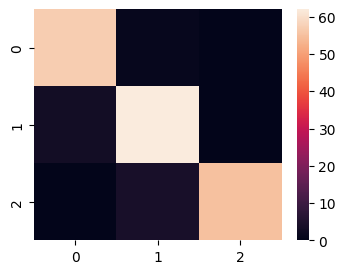

In [10]:
conf_matrix = confusion_matrix(y_pred, y_test)
print(conf_matrix)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix)

In [11]:
model_filename = './Model/svm.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

In [12]:
scaler_filename = './Model/scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)